In [186]:
colors = {
    'white': 0,
    'black': 1,
}
figures = {
    'Pawn': 1,
    'Rook': 2,
    'Knight': 3,
    'Bishop': 4,
    'Queen': 5,
    'King': 6,
}
reverse_figures = {v: k[0] for k, v in figures.items()}



In [187]:
import copy
import numpy as np

In [188]:
class Piece:
    def __init__(self, color, position):
        self.color = color
        self.position = position
        self.eliminated = False
        self.destructable = True


    def eliminate(self):
        self.eliminated = True

    def valid_moves(self, board_instance):
        return []


In [189]:
class Pawn(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.first_move = True
        self.figure = figures['Pawn']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        if self.color == colors['white']:
            if row == 1 and board_instance.check_for_empty((row + 2, col)) and board_instance.check_for_empty((row + 1, col)):
                moves.append((row + 2, col))
            if row + 1 < 8 and board_instance.check_for_empty((row + 1, col)):
                moves.append((row + 1, col))
            dc = [[1, 1], [1, -1]]
            for i in range(2):
                new_row, new_col = row + dc[i][0], col + dc[i][1]
                if 0 <= new_row < 8 and 0 <= new_col < 8 and board_instance.check_for_enemy((new_row, new_col), self.color):
                    moves.append((new_row, new_col))

        if self.color == colors['black']:
            if row == 6 and board_instance.check_for_empty((row - 2, col)) and board_instance.check_for_empty((row - 1, col)):
                moves.append((row - 2, col))
            if row - 1 >= 0 and board_instance.check_for_empty((row - 1, col)):
                moves.append((row - 1, col))
            dc = [[-1, 1], [-1, -1]]
            for i in range(2):
                new_row, new_col = row + dc[i][0], col + dc[i][1]
                if 0 <= new_row < 8 and 0 <= new_col < 8 and board_instance.check_for_enemy((new_row, new_col), self.color):
                    moves.append((new_row, new_col))

        return moves

In [190]:
class Rook(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.first_move = True
        self.figure = figures['Rook']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]

        for dr,dc in directions:
            r,c = row +dr , col + dc
            while 0 <= r < 8 and 0 <= c < 8:

                if board_instance.check_for_friendly((r,c), self.color):
                    break
                moves.append((r,c))
                if board_instance.check_for_enemy((r,c), self.color):
                    break
                r += dr
                c += dc

        return moves


In [191]:
class Knight(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.figure = figures['Knight']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        dc = [[1, 2], [1, -2], [-1, 2], [-1, -2], [2, 1], [2, -1], [-2, 1], [-2, -1]]

        for i in range(8):
            new_row, new_col = row + dc[i][0], col + dc[i][1]
            if 0 <= new_row < 8 and 0 <= new_col < 8 and not board_instance.check_for_friendly((new_row, new_col), self.color):
                moves.append((new_row, new_col))

        return moves

In [192]:
class Bishop(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.figure = figures['Bishop']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        directions = [[1, 1], [1, -1], [-1, 1], [-1, -1]]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            while 0 <= r < 8 and 0 <= c < 8:
                if board_instance.check_for_friendly((r, c), self.color):
                    break
                moves.append((r, c))
                if board_instance.check_for_enemy((r, c), self.color):
                    break
                r += dr
                c += dc

        return moves

In [193]:
class Queen(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.figure = figures['Queen']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        directions = [[1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, 1], [-1, -1]]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            while 0 <= r < 8 and 0 <= c < 8:
                if board_instance.check_for_friendly((r, c), self.color):
                    break
                moves.append((r, c))
                if board_instance.check_for_enemy((r, c), self.color):
                    break
                r += dr
                c += dc

        return moves



In [194]:
class King(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.figure = figures['King']
        self.destructable = False

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        dc = [[1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, 1], [-1, -1]]

        for i in range(8):
            new_row, new_col = row + dc[i][0], col + dc[i][1]
            if 0 <= new_row < 8 and 0 <= new_col < 8 and not board_instance.check_for_friendly((new_row, new_col), self.color):
                moves.append((new_row, new_col))

        # restricted moves
        enemy_moves = board_instance.enemy_moves(self.color)
        king_position = board_instance.get_enemy_king_position(self.color)
        if king_position:
            restricted_positions = []
            king_dc = [[1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, 1], [-1, -1]]
            king_row, king_col = king_position
            for dr, dc in king_dc:
                new_row, new_col = king_row + dr, king_col + dc
                if 0 <= new_row < 8 and 0 <= new_col < 8:
                    restricted_positions.append((new_row, new_col))

            moves = [move for move in moves if move not in restricted_positions]
        moves = [move for move in moves if move not in enemy_moves]

        valid_moves = []
        for move in moves:
            future_board = copy.deepcopy(board_instance)
            future_board.board[move[0]][move[1]] = self
            future_board.board[row][col] = None
            future_enemy_moves = future_board.future_enemy_moves(self.color)
            if move not in future_enemy_moves:
                valid_moves.append(move)

        return valid_moves


In [195]:
class Board:
    def __init__(self):
        self.board = self.create_board()
        self.populate_board()
        self.captured_pieces = []
        self.tmp_board = np.copy(self.board)

    def create_board(self):
        return np.array([[None for _ in range(8)] for _ in range(8)])

    def populate_board(self):
        self.place_pieces(Pawn, 1, colors['white'])
        self.place_pieces(Pawn, 6, colors['black'])
        self.place_pieces(Rook, 0, colors['white'], [0, 7])
        self.place_pieces(Rook, 7, colors['black'], [0, 7])
        self.place_pieces(Knight, 0, colors['white'], [1, 6])
        self.place_pieces(Knight, 7, colors['black'], [1, 6])
        self.place_pieces(Bishop, 0, colors['white'], [2, 5])
        self.place_pieces(Bishop, 7, colors['black'], [2, 5])
        self.place_pieces(Queen, 0, colors['white'], [3])
        self.place_pieces(Queen, 7, colors['black'], [3])
        self.place_pieces(King, 0, colors['white'], [4])
        self.place_pieces(King, 7, colors['black'], [4])

    def is_changed(self):
        if not np.array_equal(self.board, self.tmp_board):
            self.tmp_board = np.copy(self.board)
            return True
        return False

    def place_pieces(self, piece_class, row, color, cols=None):
        if cols is None:
            for col in range(8):
                self.board[row][col] = piece_class(color, (row, col))
        else:
            for col in cols:
                self.board[row][col] = piece_class(color, (row, col))

    def move_piece(self, start_pos, end_pos):
        piece = self.get_piece(start_pos)
        if not piece:
            return False
        if end_pos not in piece.valid_moves(self):
            return False
        target_piece = self.get_piece(end_pos)
        if target_piece:
            if isinstance(target_piece, King):
                return False
            if target_piece.color != piece.color:
                target_piece.eliminate()
                self.captured_pieces.append(target_piece)

        self.board[start_pos[0]][start_pos[1]] = None
        piece.position = end_pos
        self.board[end_pos[0]][end_pos[1]] = piece
        return True

    def show_board(self):
        print("  " + " ".join(str(x) for x in range(8)))
        for y, row in enumerate(self.board):
            print(f"{y} " + " ".join([reverse_figures[piece.figure] if piece else '.' for piece in row]))

    def get_piece(self, position):
        row, col = position
        return self.board[row][col]

    def check_for_enemy(self, position, color):
        piece = self.get_piece(position)
        return piece and piece.color != color

    def check_for_friendly(self, position, color):
        piece = self.get_piece(position)
        return piece and piece.color == color

    def check_for_empty(self, position):
        return not self.get_piece(position)

    def get_moves(self, color):
        color_value = colors[color]  # Convert color to its corresponding integer value
        moves = []
        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece and piece.color == color_value:
                    piece_moves = piece.valid_moves(self)
                    for move in piece_moves:
                        moves.append([(row, col), move])
        return moves

    def enemy_moves(self, color):
        moves = []
        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece and piece.color != color and not isinstance(piece, King):
                    piece_moves = piece.valid_moves(self)
                    if isinstance(piece, Pawn):
                        piece_moves = self.filter_pawn_moves(piece, piece_moves, row, col)
                    for move in piece_moves:
                        moves.append([(row, col), move])
        return moves

    def filter_pawn_moves(self, piece, piece_moves, row, col):
        if piece.color == colors['white']:
            return [move for move in piece_moves if not (move[0] == row + 1 and move[1] == col) and not (move[0] == row + 2 and move[1] == col)]
        elif piece.color == colors['black']:
            return [move for move in piece_moves if not (move[0] == row - 1 and move[1] == col) and not (move[0] == row - 2 and move[1] == col)]
        return piece_moves

    def future_enemy_moves(self, color):
        return self.enemy_moves(color)

    def get_enemy_king_position(self, color):
        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece and isinstance(piece, King) and piece.color != color:
                    return (row, col)
        return None

    def enemy_king_moves(self, color):
        enemy_king_position = self.get_enemy_king_position(color)
        if enemy_king_position:
            enemy_king = self.get_piece(enemy_king_position)
            if isinstance(enemy_king, King):
                return enemy_king.valid_moves(self)
        return []

    def get_king_position(self, color):
        color_value = colors[color]  # Convert color to its corresponding integer value
        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece and isinstance(piece, King) and piece.color == color_value:
                    return (row, col)
        return None

    def is_check(self, color):
        king_position = self.get_king_position(color)
        checking_pieces = []
        enemy_moves = self.get_moves('white' if color == 'black' else 'black')
        for move in enemy_moves:
            if move[1] == king_position:
                checking_pieces.append(self.get_piece(move[0]))

        return bool(checking_pieces), checking_pieces

    def check_for_check_mate(self, color, valid_moves):
        in_check, checking_pieces = self.is_check(color)
        if in_check and len(valid_moves) == 0:
            return True
        return False

    def check_for_pat(self, color, valid_moves):
        in_check, _ = self.is_check(color)
        if not in_check and len(valid_moves) == 0:
            return True
        return False

    def translate_to_matrix(self):

        pawn_matrix = np.zeros((8, 8), dtype=int)
        rook_matrix = np.zeros((8, 8), dtype=int)
        knight_matrix = np.zeros((8, 8), dtype=int)
        bishop_matrix = np.zeros((8, 8), dtype=int)
        queen_matrix = np.zeros((8, 8), dtype=int)
        king_matrix = np.zeros((8, 8), dtype=int)

        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece:
                    value = 1 if piece.color == colors['white'] else -1
                    if isinstance(piece, Pawn):
                        pawn_matrix[row, col] = value
                    elif isinstance(piece, Rook):
                        rook_matrix[row, col] = value
                    elif isinstance(piece, Knight):
                        knight_matrix[row, col] = value
                    elif isinstance(piece, Bishop):
                        bishop_matrix[row, col] = value
                    elif isinstance(piece, Queen):
                        queen_matrix[row, col] = value
                    elif isinstance(piece, King):
                        king_matrix[row, col] = value

        board_matrix = np.array([pawn_matrix, rook_matrix, knight_matrix, bishop_matrix, queen_matrix, king_matrix])

        return board_matrix






In [196]:
board = Board()
board.populate_board()

In [197]:
board_matrix = board.translate_to_matrix()
print(board_matrix.shape)

(6, 8, 8)


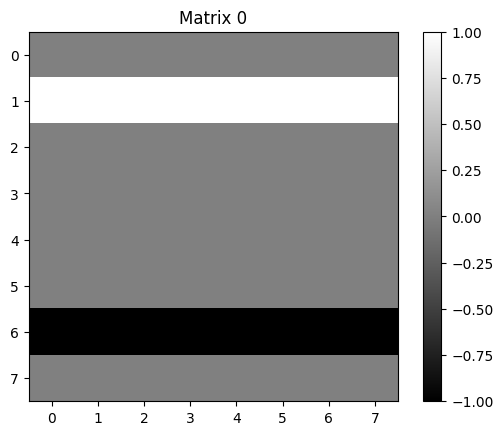

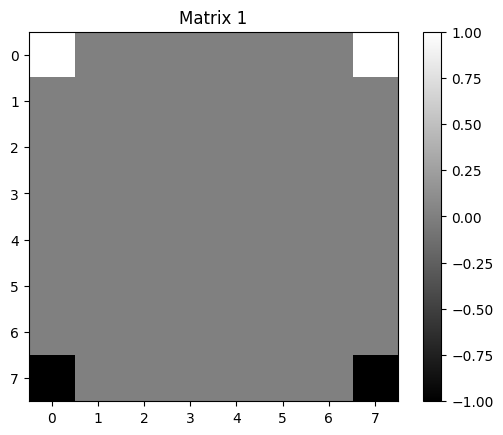

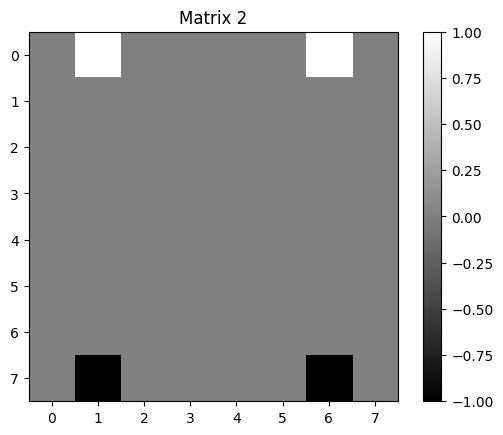

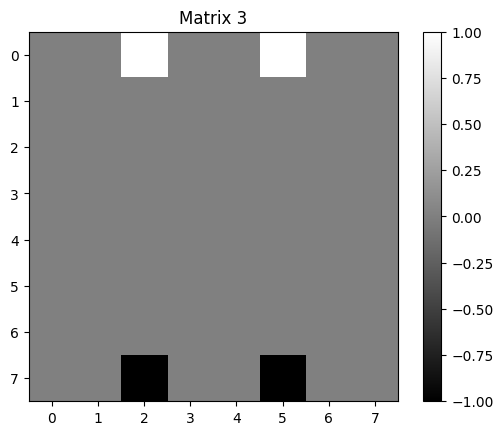

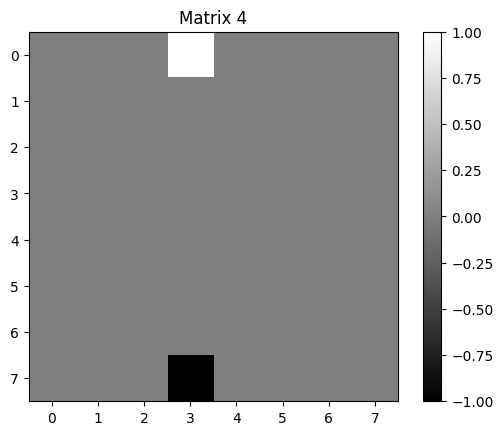

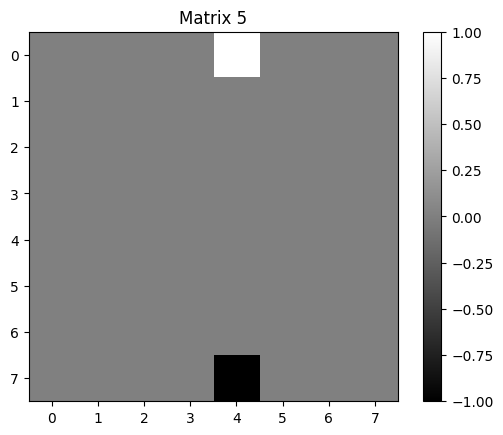

In [198]:
import matplotlib.pyplot as plt

# Assuming board_matrix is already defined
num_matrices = board_matrix.shape[0]

for i in range(num_matrices):
    matrix = board_matrix[i]
    plt.figure()
    plt.imshow(matrix, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Matrix {i}')
    plt.show()

In [199]:
import pygame

# Constants
WIDTH, HEIGHT = 800, 800
ROWS, COLS = 8, 8
SQUARE_SIZE = WIDTH // COLS

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
LIGHT_BROWN = (240, 217, 181)
DARK_BROWN = (181, 136, 99)
BLUE = (0, 0, 255)
RED = (255, 0, 0)

WIN = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption('Chess')

colors = {
    'white': 0,
    'black': 1,
}
figures = {
    'Pawn': 1,
    'Rook': 2,
    'Knight': 3,
    'Bishop': 4,
    'Queen': 5,
    'King': 6,
}
reverse_figures = {v: k[0] for k, v in figures.items()}

def load_images():
    pieces = {
        'wp': 'white pawn',
        'bp': 'black pawn',
        'wr': 'white rook',
        'br': 'black rook',
        'wn': 'white knight',
        'bn': 'black knight',
        'wb': 'white bishop',
        'bb': 'black bishop',
        'wq': 'white queen',
        'bq': 'black queen',
        'wk': 'white king',
        'bk': 'black king'
    }
    images = {}
    for piece, name in pieces.items():
        file_name = name.replace(' ', '_') + '.png'
        try:
            images[piece] = pygame.transform.scale(pygame.image.load(f'images/{file_name}'), (SQUARE_SIZE, SQUARE_SIZE))
        except FileNotFoundError:
            print(f"File not found: images/{file_name}")
    return images

def draw_board(win):
    win.fill(WHITE)
    for row in range(ROWS):
        for col in range(COLS):
            color = LIGHT_BROWN if (row + col) % 2 == 0 else DARK_BROWN
            pygame.draw.rect(win, color, (col * SQUARE_SIZE, row * SQUARE_SIZE, SQUARE_SIZE, SQUARE_SIZE))

def draw_pieces(win, board):
    for row in range(ROWS):
        for col in range(COLS):
            piece = board[row][col]
            if piece:
                piece_key = f"{'w' if piece.color == 0 else 'b'}{'n' if piece.__class__.__name__ == 'Knight' else piece.__class__.__name__[0].lower()}"
                win.blit(IMAGES[piece_key], (col * SQUARE_SIZE, row * SQUARE_SIZE))

def highlight_moves(win, piece_position, valid_moves):
    for move in valid_moves:
        if tuple(move[0]) == piece_position:
            row, col = move[1]
            pygame.draw.circle(win, BLUE, (col * SQUARE_SIZE + SQUARE_SIZE // 2, row * SQUARE_SIZE + SQUARE_SIZE // 2), SQUARE_SIZE // 4)

def handle_mouse_button_up(board_instance, selected_piece, dragging, SQUARE_SIZE, valid_moves):
    if dragging and selected_piece:
        pos = pygame.mouse.get_pos()
        col, row = pos[0] // SQUARE_SIZE, pos[1] // SQUARE_SIZE
        end_pos = [row, col]
        start_pos = list(selected_piece.position)
        if [start_pos, end_pos] in valid_moves:
            board_instance.move_piece(tuple(start_pos), tuple(end_pos))
            selected_piece.position = tuple(end_pos)
    return None, False

def handle_mouse_button_down(board_instance, SQUARE_SIZE, current_turn_color):
    pos = pygame.mouse.get_pos()
    col, row = pos[0] // SQUARE_SIZE, pos[1] // SQUARE_SIZE
    piece = board_instance.get_piece((row, col))
    if piece and piece.color == colors[current_turn_color]:
        selected_piece = piece
        dragging = True
        drag_offset_x = pos[0] - col * SQUARE_SIZE
        drag_offset_y = pos[1] - row * SQUARE_SIZE
        return selected_piece, dragging, drag_offset_x, drag_offset_y
    return None, False, 0, 0

def handle_mouse_motion(dragging, SQUARE_SIZE):
    col, row = -1, -1  # Initialize with default values
    if dragging:
        pos = pygame.mouse.get_pos()
        col, row = pos[0] // SQUARE_SIZE, pos[1] // SQUARE_SIZE
    return col, row

IMAGES = load_images()

In [200]:
import pygame
import sys
import copy



def main():
    turn_iteration = 1
    board_instance = board
    selected_piece = None
    valid_moves = []
    dragging = False
    drag_offset_x = 0
    drag_offset_y = 0
    turn = 1
    colors_turn = ['white', 'black']

    run = True
    while run:
        event = pygame.event.wait()

        if event.type == pygame.QUIT:
            run = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            if event.button == 1:
                selected_piece, dragging, drag_offset_x, drag_offset_y = handle_mouse_button_down(board_instance, SQUARE_SIZE, colors_turn[turn])
        elif event.type == pygame.MOUSEBUTTONUP:
            if event.button == 1:
                selected_piece, dragging = handle_mouse_button_up(board_instance, selected_piece, dragging, SQUARE_SIZE, valid_moves)
                dragging = False
                selected_piece = None

        elif event.type == pygame.MOUSEMOTION:
            col, row = handle_mouse_motion(dragging, SQUARE_SIZE)

        if board_instance.is_changed():


            turn = 1 if turn == 0 else 0
            print("Turn:",turn_iteration, colors_turn[turn])
            turn_iteration += 1
            moves = board_instance.get_moves(colors_turn[turn])
            moves_free_check = []
            for move in moves:
                future_board = copy.deepcopy(board_instance)
                start_pos = tuple(move[0])
                end_pos = tuple(move[1])
                future_board.move_piece(start_pos, end_pos)
                if not future_board.is_check(colors_turn[turn])[0]:
                    moves_free_check.append([list(move[0]), list(move[1])])  # Convert to lists
            valid_moves = moves_free_check


            print("Is check", board_instance.is_check(colors_turn[turn]))
            if board_instance.check_for_check_mate(colors_turn[turn], valid_moves):
                print(f"Checkmate! {colors_turn[turn]} is in checkmate!")
            elif board_instance.check_for_pat(colors_turn[turn], valid_moves):
                print(f"Pat! {colors_turn[turn]} is in pat!")

        draw_board(WIN)
        draw_pieces(WIN, board_instance.board)
        if selected_piece:
            highlight_moves(WIN, selected_piece.position, valid_moves)

        if dragging and selected_piece:
            pos = pygame.mouse.get_pos()
            WIN.blit(IMAGES[f"{'w' if selected_piece.color == 0 else 'b'}{'n' if selected_piece.__class__.__name__ == 'Knight' else selected_piece.__class__.__name__[0].lower()}"], (pos[0] - drag_offset_x, pos[1] - drag_offset_y))

        pygame.display.flip()

    pygame.quit()
    sys.exit()

if __name__ == "__main__":
    main()

Turn: 1 white
Is check (False, [])


SystemExit: 

C:\Users\kulak\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
